In [108]:
import pandas as pd
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
import talib as ta
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

In [109]:
df1 = pd.read_csv('data.csv')
df2 = pd.read_csv('data2.csv')
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])
filter_date = pd.to_datetime('2019-11-01')
df2 =  df2[df2['Date'] > filter_date]
df = pd.concat([df1,df2], ignore_index=True)
df = df.sort_values(by='Date')
df.drop_duplicates(subset=['Date'])

,Date,Price,Open,High,Low,Vol.,Change %
4999,2000-01-10,282.70,282.40,283.90,281.80,30.60K,-0.07%
4998,2000-01-11,284.40,282.40,285.30,281.90,13.50K,0.60%
4997,2000-01-12,283.70,284.50,285.00,282.50,17.84K,-0.25%
4996,2000-01-13,285.10,283.50,285.90,282.90,12.17K,0.49%
4995,2000-01-14,284.90,285.20,285.60,284.00,32.34K,-0.07%
...,...,...,...,...,...,...,...
5004,2024-09-06,"2,524.60","2,547.10","2,559.80","2,513.90",228.12K,-0.73%
5003,2024-09-09,"2,532.70","2,526.50","2,536.50","2,514.20",140.58K,0.32%
5002,2024-09-10,"2,543.10","2,536.00","2,547.50","2,528.90",156.11K,0.41%
5001,2024-09-11,"2,542.40","2,545.70","2,558.00","2,529.00",194.09K,-0.03%


In [110]:
df['Price'] = df['Price'].apply(locale.atof)
df['Open'] = df['Open'].apply(locale.atof)
df['High'] = df['High'].apply(locale.atof)
df['Low'] = df['Low'].apply(locale.atof)

In [111]:
df = df.set_index("Date")

<Axes: xlabel='Date'>

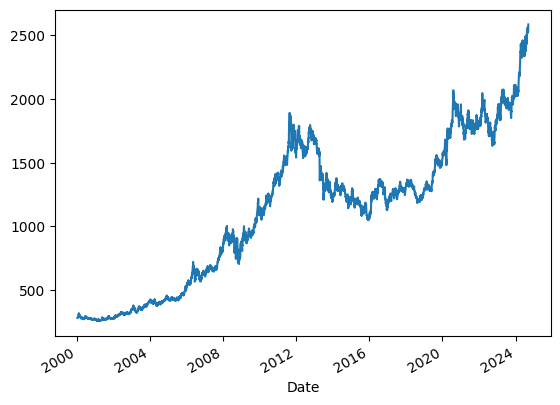

In [112]:
df['Price'].plot()

In [113]:
def change_percent(percentage_str):
    return float(percentage_str.strip('%')) / 100
def change_vol(value_str):
    value_str = str(value_str)
    if value_str.endswith('K'):
        value = float(value_str[:-1]) * 1_000
    elif value_str.endswith('M'):
        value = float(value_str[:-1]) * 1_000_000
    elif value_str.endswith('B'):
        value = float(value_str[:-1]) * 1_000_000_000
    else:
        value = float(value_str)
    return value

In [114]:
df['Change %']=df['Change %'].apply(change_percent)

In [115]:
df['Vol.'] = df['Vol.'].apply(change_vol)

In [116]:
df['RSI'] = ta.RSI(df['Price'], timeperiod = 14)

In [117]:
df['CCI'] = ta.CCI(df['High'], df['Low'], df['Price'], timeperiod=14)


In [118]:
df['RSI_Change'] = ta.RSI(df['Change %'], timeperiod = 3)

In [119]:
df['ADX'] = ta.ADX(df['High'], df['Low'], df['Price'], timeperiod=14)


In [120]:
df['Change_SMA_3'] = ta.SMA(df['Change %'].shift(1),  timeperiod=3)
df['Change_SMA_5'] = ta.SMA(df['Change %'].shift(1), timeperiod=5)
df['Change_SMA_7'] = ta.SMA(df['Change %'].shift(1), timeperiod=7)
df['Change_SMA_14'] = ta.SMA(df['Change %'].shift(1), timeperiod=14)

In [121]:
df['Last_Change'] = list(df['Change %'].shift(1))
df['Target_Change'] = list(df['Change %'].shift(-1))



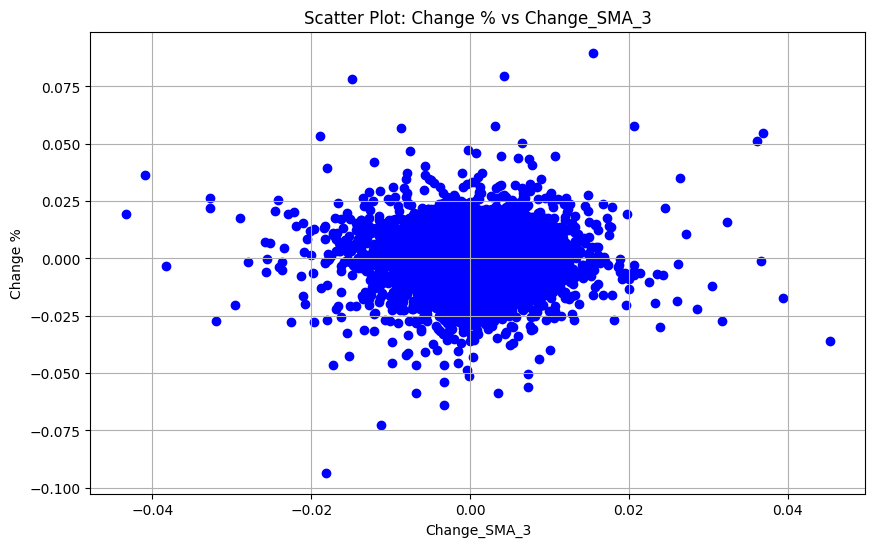

In [122]:
# Assuming df is loaded and has the required columns for plotting

# Creating a scatter plot for df['Change_SMA_3'] vs df['Change %']
plt.figure(figsize=(10, 6))
plt.scatter(df['Change_SMA_3'], df['Change %'], color='b')
plt.xlabel('Change_SMA_3')
plt.ylabel('Change %')
plt.title('Scatter Plot: Change % vs Change_SMA_3')
plt.grid(True)
plt.show()


In [123]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the DataFrame
df_standardized = pd.DataFrame(scaler.fit_transform(df.drop("Change %", axis =1)), columns=[col for col in df.columns if col !='Change %'])

/Users/moksh/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/moksh/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/moksh/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/moksh/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

In [124]:
df_standardized['Target'] = list(df.shift(-1)['Change %'] * 100) 

In [125]:
def get_label(val):
    if val < 0:
        return 0
    else:
        return 1

In [126]:
df_standardized['Target'] = list(df.shift(-1)['Change %'] * 100) 

In [127]:
df_standardized['Target'] = df_standardized['Target'].apply(get_label)

In [128]:
df_standardized = df_standardized.dropna()

In [129]:
df_standardized.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'RSI', 'CCI', 'RSI_Change',
       'ADX', 'Change_SMA_3', 'Change_SMA_5', 'Change_SMA_7', 'Change_SMA_14',
       'Last_Change', 'Target_Change', 'Target'],
      dtype='object')

In [131]:


# Assuming df_standardized is already defined

# 1. Separate the features and the target column
X = df_standardized[['Price', 'Open', 'High', 'Low', 'Vol.', 'RSI', 'CCI', 'RSI_Change',
       'ADX', 'Change_SMA_3', 'Change_SMA_5', 'Change_SMA_7', 'Change_SMA_14',
       'Last_Change',]]  # Features
y = df_standardized['Target']  # Target

split = 0.75

split_index = int(X.shape[0] * split)

X_train = X.iloc[:split_index]
y_train = y.iloc[:split_index]

X_test = X.iloc[split_index:]
y_test = y.iloc[split_index:]


# 2. Split the data into training and testing sets

# 3. Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Initialize the neural network model
model = Sequential()

# Add input layer (input_dim should match the number of features)
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # 64 neurons in the first hidden layer
model.add(Dense(32, activation='relu'))  # 32 neurons in the second hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer, 1 neuron for regression

# 5. Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# 6. Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)







Epoch 1/50


/Users/moksh/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/moksh/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/moksh/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/moksh/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

  8/117 [=>............................] - ETA: 0s - loss: 0.2508 

2024-09-13 20:39:33.502697: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


117/117 [==============================] - ETA: 0s - loss: 0.2506

2024-09-13 20:39:34.524761: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


117/117 [==============================] - 2s 11ms/step - loss: 0.2506 - val_loss: 0.2518
Epoch 2/50
117/117 [==============================] - 1s 7ms/step - loss: 0.2473 - val_loss: 0.2502
Epoch 3/50
117/117 [==============================] - 1s 7ms/step - loss: 0.2471 - val_loss: 0.2553
Epoch 4/50
117/117 [==============================] - 1s 7ms/step - loss: 0.2450 - val_loss: 0.2525
Epoch 5/50
117/117 [==============================] - 1s 7ms/step - loss: 0.2448 - val_loss: 0.2518
Epoch 6/50
117/117 [==============================] - 1s 7ms/step - loss: 0.2431 - val_loss: 0.2509
Epoch 7/50
117/117 [==============================] - 1s 8ms/step - loss: 0.2426 - val_loss: 0.2532
Epoch 8/50
117/117 [==============================] - 1s 8ms/step - loss: 0.2416 - val_loss: 0.2544
Epoch 9/50
117/117 [==============================] - 1s 11ms/step - loss: 0.2404 - val_loss: 0.2549
Epoch 10/50
117/117 [==============================] - 1s 8ms/step - loss: 0.2403 - val_loss: 0.2551
Epoch 11

In [143]:
# 7. Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
y_pred_proba = model.predict(X_test)

49/49 [==============================] - 0s 3ms/step


In [22]:
"""
# 1. Separate the features and the target column
X = df_standardized[['Price', 'Open', 'High', 'Low', 'Vol.', 'RSI', 'CCI', 'RSI_Change',
       'ADX', 'Change_SMA_3', 'Change_SMA_5', 'Change_SMA_7', 'Change_SMA_14',
       'Last_Change',]]  # Features
y = df_standardized['Target']  # Target

# 2. Split the data into training and testing sets (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize the linear regression model
model = RandomForestRegressor()

# 4. Train the model
model.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = model.predict(X_test)

# 6. Evaluate the model (optional)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
"""


'\n# 1. Separate the features and the target column\nX = df_standardized[[\'Price\', \'Open\', \'High\', \'Low\', \'Vol.\', \'RSI\', \'CCI\', \'RSI_Change\',\n       \'ADX\', \'Change_SMA_3\', \'Change_SMA_5\', \'Change_SMA_7\', \'Change_SMA_14\',\n       \'Last_Change\',]]  # Features\ny = df_standardized[\'Target\']  # Target\n\n# 2. Split the data into training and testing sets (optional but recommended)\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# 3. Initialize the linear regression model\nmodel = RandomForestRegressor()\n\n# 4. Train the model\nmodel.fit(X_train, y_train)\n\n# 5. Make predictions on the test set\ny_pred = model.predict(X_test)\n\n# 6. Evaluate the model (optional)\nmse = mean_squared_error(y_test, y_pred)\nprint("Mean Squared Error:", mse)\n'

In [144]:
y_pred = [1 if val > 0.5 else 0 for val in y_pred]

In [145]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.19      0.27       700
           1       0.56      0.85      0.67       854

    accuracy                           0.55      1554
   macro avg       0.53      0.52      0.47      1554
weighted avg       0.53      0.55      0.49      1554



In [152]:
combo_results = []
for j in range(1,100):
    threshold = float(j/100)
    results = []
    y_test = list(y_test)
    y_pred = list(y_pred)
    for i in range(len(list(y_test))):
        if y_pred_proba[i] > threshold:

            results.append(y_pred[i] == y_test[i])
    if results:
        combo_results.append({j:(sum(results)/len(results), len(results))})
            


In [163]:
vals = [list(combo.values())[0][0] for combo in combo_results]

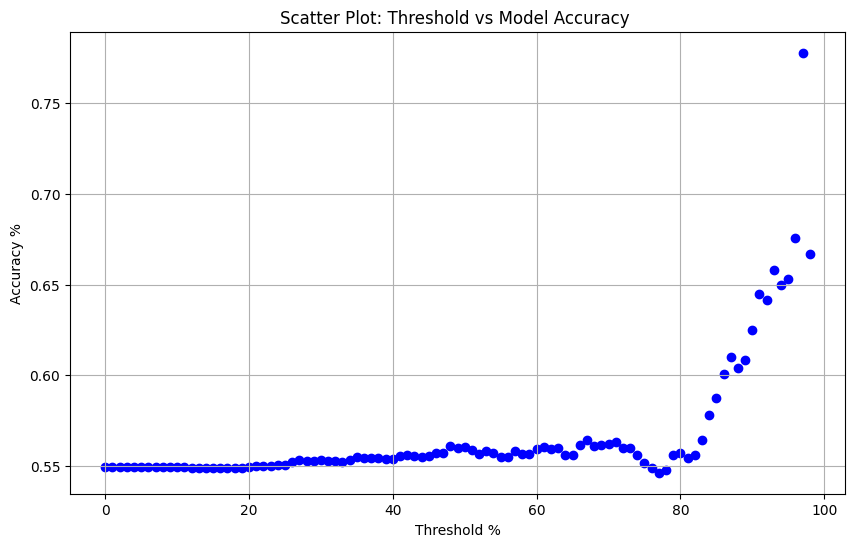

In [170]:
# Assuming df is loaded and has the required columns for plotting

# Creating a scatter plot for df['Change_SMA_3'] vs df['Change %']
plt.figure(figsize=(10, 6))
plt.scatter(list(range(len(vals))), vals, color='b')
plt.xlabel('Threshold %')
plt.ylabel('Accuracy %')
plt.title('Scatter Plot: Threshold vs Model Accuracy ')
plt.grid(True)
plt.show()


In [173]:
split = 0.75

split_index = int(X.shape[0] * split)
df_backtest = df.iloc[split_index:]

In [ ]:
y_test = 

In [96]:
#threshold: confidence = 0.75
#limit to one position at a time
#risk-free rate at 4.5% -> this is the rate sittting capital grows at
#margin rate is 10% -> this is how much of the position should be in the margin account at all times
#2% interest accrued in margin -> this is how much that margin grows a year
#initial portfolio value 
#index rate is 7.4% annualized


In [98]:
for i, row in df_backtest.iterrows():
    if row == 
    
    
    
    

,Price,Open,High,Low,Vol.,Change %,RSI,CCI,RSI_Change,ADX,Change_SMA_3,Change_SMA_5,Change_SMA_7,Change_SMA_14,Last_Change,Target_Change
Date,,,,,,,,,,,,,,,,
2000-01-10,282.7,282.40,283.90,281.8,30600.0,-0.0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0060
2000-01-11,284.4,282.40,285.30,281.9,13500.0,0.0060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0007,-0.0025
2000-01-12,283.7,284.50,285.00,282.5,17840.0,-0.0025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0060,0.0049
2000-01-13,285.1,283.50,285.90,282.9,12170.0,0.0049,NaN,NaN,62.389381,NaN,9.333333e-04,NaN,NaN,NaN,-0.0025,-0.0007
2000-01-14,284.9,285.20,285.60,284.0,32340.0,-0.0007,NaN,NaN,45.483871,NaN,2.800000e-03,NaN,NaN,NaN,0.0049,0.0165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-06,2524.6,2547.10,2559.80,2513.9,228120.0,-0.0073,53.588173,-52.149412,35.760725,15.366155,2.066667e-03,0.00046,-0.000643,0.001486,0.0068,0.0032
2024-09-09,2532.7,2526.50,2536.50,2514.2,140580.0,0.0032,55.222585,-76.700812,57.503680,14.289797,2.333333e-04,-0.00278,-0.001557,-0.000336,-0.0073,0.0041
2024-09-10,2543.1,2536.00,2547.50,2528.9,156110.0,0.0041,57.301692,13.686129,59.275886,13.735941,9.000000e-04,0.00042,-0.000257,-0.000207,0.0032,-0.0003
